In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.cluster import KMeans

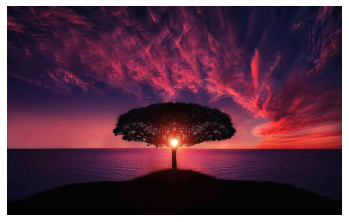

In [2]:
img=plt.imread("tree-736885__480.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
type(img)

numpy.ndarray

In [4]:
print(img.shape)

(480, 771, 3)


In [5]:
print(img.size)

1110240


In [6]:
w,h,d=img.shape
image_array=img.reshape(w*h,d)
print(image_array.shape)

(370080, 3)


In [7]:
image_array=image_array/255

In [8]:
from sklearn.utils import shuffle
image_array_sample=shuffle(image_array,random_state=1)[:1000]
image_array_sample.size

3000

In [9]:
Kmeans=KMeans(n_clusters=6,random_state=1)
Kmeans.fit(image_array_sample)

KMeans(n_clusters=6, random_state=1)

In [10]:
labels=Kmeans.predict(image_array)
labels

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
print(Kmeans.cluster_centers_)

[[0.66258979 0.2253543  0.30561056]
 [0.03383442 0.0159695  0.02206972]
 [0.2514082  0.11032086 0.2312656 ]
 [0.85375817 0.34553377 0.34896514]
 [0.11846468 0.07204179 0.16516012]
 [0.43085901 0.16003735 0.28510738]]


In [12]:
c=Kmeans.cluster_centers_

In [13]:
def recreate_image(c,labels,w,h,d):
    image=np.zeros((w,h,d))
    label_idx=0
    for i in range(w):
        for j in range (h):
            image[i][j]=c[labels[label_idx]]
            label_idx+=1
    return(image)

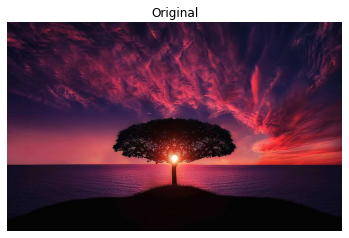

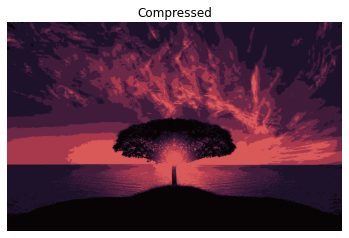

In [15]:
plt.figure(1)
plt.axis("off")
plt.title("Original")
plt.imshow(img)
plt.show()
plt.figure(2)
plt.axis("off")
plt.title("Compressed")
plt.imshow(recreate_image(c,labels,w,h,d))
plt.show()